In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
datahw01 = pd.read_csv('datasethw01.csv')
datahw01.size, datahw01.shape

In [4]:
datahw01.head()

,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,2017-07-01 00:02:57,-61,68.769997,1855.54,90.0,1,1,0.45,3
1,2017-07-01 00:05:29,-71,69.169998,1685.62,90.0,1,1,0.51,2
2,2017-07-01 00:08:02,-65,69.279999,1770.92,90.0,1,1,0.00,1
3,2017-07-01 00:10:30,-103,0.820000,256.07,60.0,1,1,3.35,4
4,2017-07-01 00:10:37,-61,68.860001,452.50,90.0,1,1,0.00,1


## Unconditional mono-variate analysis

In [5]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
unc_monovar

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-100.162540,8.266168,1351.002691,102.613886,0.988159,1.665231,1.179569
std $\sigma_d$,17.206732,18.557894,3370.050802,97.257257,0.108227,0.517878,1.474385
Skewness $\gamma_d$,0.683338,2.659948,8.142499,4.779568,-9.040485,-1.183276,2.472588


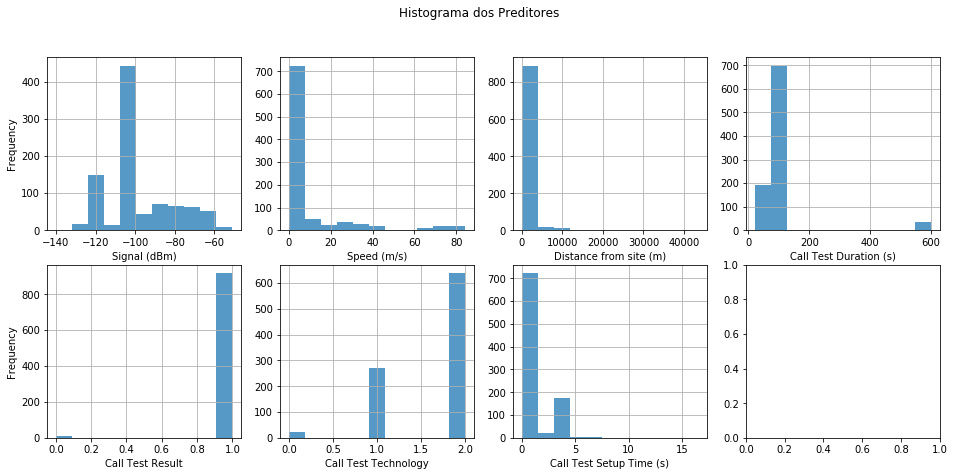

In [114]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(1, 8):
    ax[i-1].grid()
    ax[i-1].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i-1].hist(datahw01.iloc[:, i], bins='sturges', alpha=.75)

## Class-conditional mono-variate analysis

In [79]:
cls = datahw01.groupby('MOS')
classes = ['Bad (1)', 'Poor (2)', 'Fair (3)', 'Good (4)']
print('Classe  | Quantidade')
for i in cls.indices:
    print(f'{classes[i-1]} |    {cls.get_group(i).iloc[:,1:].shape[0]}')

Classe  | Quantidade
Bad (1) |    39
Poor (2) |    46
Fair (3) |    125
Good (4) |    719


In [70]:
cls_monovar = []
for i in range(len(cls.indices)):
    cls_monovar.append(cls.get_group(i+1).describe().iloc[1:3,:-1].append(cls.get_group(1).skew()[:-1], 
                                                                          ignore_index=True))
    cls_monovar[i].index = ['Mean $\mu_{d|l_%d}$'%(i+1),'std $\sigma_{d|l_%d}$'%(i+1),
                            'Skewness $\gamma_{d|l_%d}$'%(i+1)]
    display(classes[i], cls_monovar[i])

'Bad (1)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_1}$,-79.051282,39.292820,5202.475641,118.362564,0.948718,0.897436,1.026667
std $\sigma_{d|l_1}$,12.810252,32.930717,9918.787064,141.814374,0.223456,0.307355,1.543622
Skewness $\gamma_{d|l_1}$,-0.295257,0.060054,2.623576,3.223005,-4.233256,-2.725964,1.026515


'Poor (2)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_2}$,-77.434783,30.456957,4454.507609,281.880435,0.956522,0.826087,0.700435
std $\sigma_{d|l_2}$,13.245800,22.321566,5967.386270,249.041183,0.206185,0.383223,1.341621
Skewness $\gamma_{d|l_2}$,-0.295257,0.060054,2.623576,3.223005,-4.233256,-2.725964,1.026515


'Fair (3)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_3}$,-77.312000,13.011760,1153.210400,96.382320,0.992000,0.976000,3.282480
std $\sigma_{d|l_3}$,11.626177,19.475256,1913.613919,126.138810,0.089443,0.199354,1.923854
Skewness $\gamma_{d|l_3}$,-0.295257,0.060054,2.623576,3.223005,-4.233256,-2.725964,1.026515


'Good (4)'

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_{d|l_4}$,-106.734353,4.338470,977.922531,91.373950,0.991655,1.880389,0.852921
std $\sigma_{d|l_4}$,12.173208,13.703765,2244.749613,48.171649,0.091032,0.345511,1.019200
Skewness $\gamma_{d|l_4}$,-0.295257,0.060054,2.623576,3.223005,-4.233256,-2.725964,1.026515


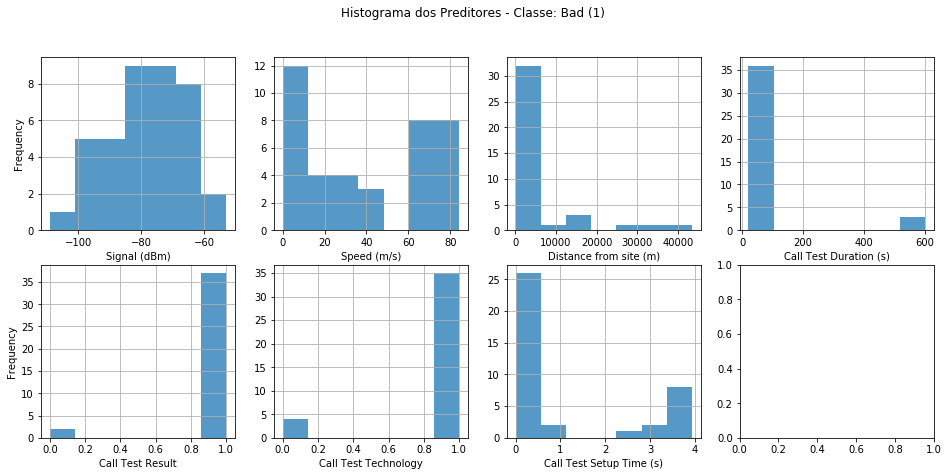

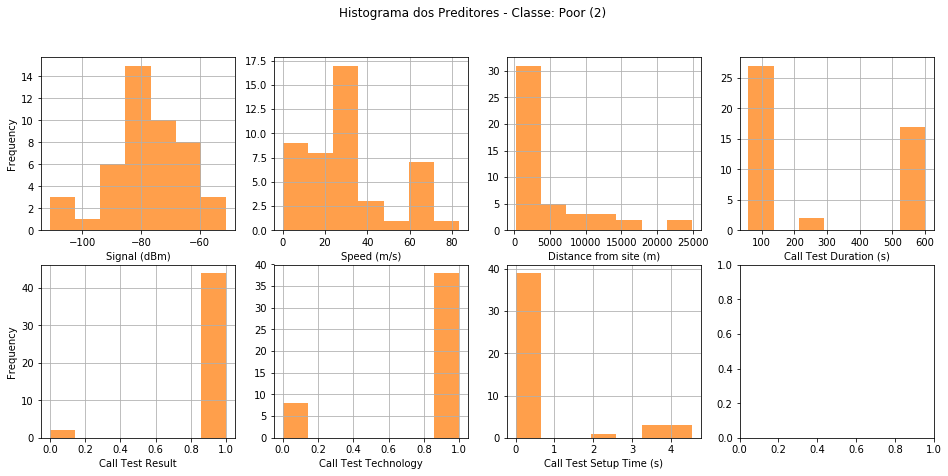

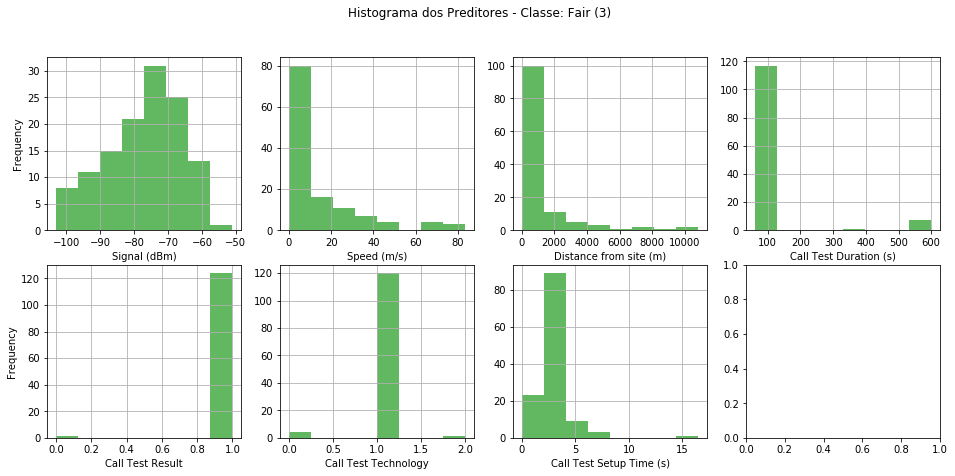

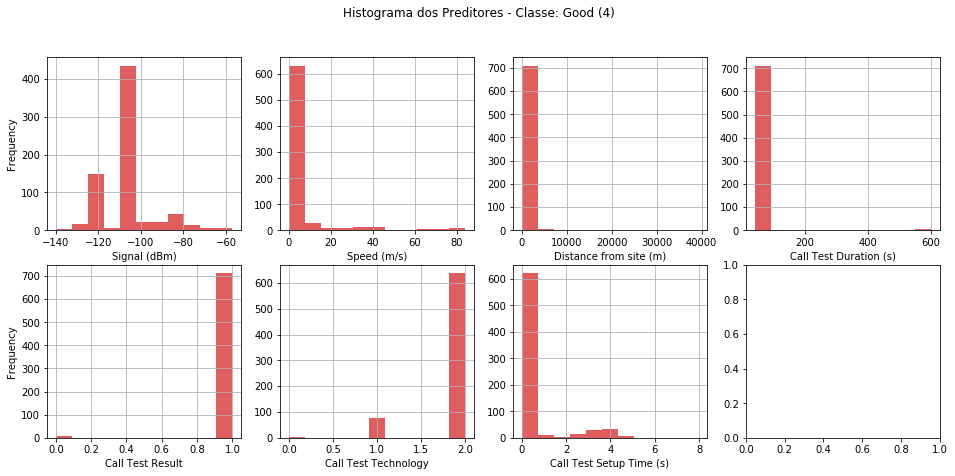

In [115]:
color=['C0','C1','C2', 'C3']
for j in cls.indices:
    fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
    ax = ax.ravel()
    fig.suptitle(f'Histograma dos Preditores - Classe: {classes[j-1]}')
    for i in range(1, 8):
        ax[i-1].grid()
        ax[i-1].set_xlabel(cls.get_group(j).columns[i])
        ax[0].set_ylabel('Frequency')
        ax[4].set_ylabel('Frequency')
        ax[i-1].hist(cls.get_group(j).iloc[:, i], bins='sturges', color=color[j-1], alpha=.75)

### Informações

 - Dados:

929 observações e 9 colunas, totalizando size=8370 com 7 preditores e 4 classes

1 = sucesso no teste = 919  
0 = falhas no teste  = 11

- Preditores:

```['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)', 'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology' , 'Call Test Setup Time (s)']```

- Tecnologias:

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 0  | GSM  | 21 |
| 1  | UMTS  | 270 |
| 2  | LTE  | 639 |


- Classes MOS

4 classes no dataset: 

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 1  | Bad  | 39 |
| 2  | Poor  | 47 |
| 3  | Fair  | 125 |
| 4  | Good  | 719 |

https://en.wikipedia.org/wiki/Mean_opinion_score

Links úteis:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://pandas.pydata.org/pandas-docs/stable/reference/series.html

In [5]:
# unicas ocorrencias
#datahw01['MOS'].nunique()
# busca por valores:
# for i in range(8):
#     print(datahw01.iloc[:,i+1].all()==0)
# grupos:
# grouped = datahw01.groupby('MOS')
# print('mos class:')
# for name, group in grouped:
#     print(name)
#     print(group.shape)